# Linearer Regressionsalgorithmus mit Boston Housing Dataset

Importieren der erforderlichen Bibliotheken

In [549]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,explained_variance_score,median_absolute_error

**Datensatz** einlesen und ausgeben

In [550]:
data = pd.read_csv('./boston.csv') 
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


`CRIM`: Pro-Kopf-Kriminalitätsrate nach Stadt<br>
`ZN`: Anteil des Wohngrundstücks, das für Grundstücke über 25.000 Quadratfuß ausgewiesen ist.<br>
`INDUS`: Anteil der Nicht-Einzelhandelsflächen pro Stadt.<br>
`CHAS`: Charles River-Dummy-Variable (1, wenn das Gebiet an den Fluss grenzt; andernfalls 0)<br>
`NOX`: Stickoxidkonzentration (Teile pro 10 Millionen)<br>
`RM`: durchschnittliche Anzahl der Zimmer pro Wohnung<br>
`AGE`: Anteil der Eigentumswohnungen, die vor 1940 gebaut wurden<br>
`DIS`: gewichtete Entfernungen zu fünf Bostoner Arbeitsvermittlungszentren<br>
`RAD`: Index der Erreichbarkeit von Radialstraßen<br>
`TAX`: Vollwert-Grundsteuersatz pro 10.000 US-Dollar<br>
`PTRATIO`: Schüler-Lehrer-Verhältnis nach Stadt<br>
`B`: 1000(Bk - 0,63)^2 wobei Bk der Anteil der Schwarzen pro Stadt ist<br>
`LSTAT`: % niedrigerer Status der Bevölkerung<br>
`MEDV`: Medianwert von Eigenheimen in 1.000 US-Dollar<br>


## Datensatz bereinigen

Nullwerte pro Spalte ausgeben

In [551]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Duplikate suchen und ggf. eliminieren

In [552]:
dublicate_data = data.copy() # Daten kopieren
dublicate_data.drop_duplicates(subset=None,inplace=True) # Duplikate rauswerfen
print(dublicate_data.shape)
print(data.shape)

(506, 14)
(506, 14)


## Features und Target
- {`CRIM`, `ZN`, `INDUS`, `CHAS`, `NOX`, `RM`, `AGE`, `DIS`, `RAD`, `TAX`, `PTRATIO`, `B`, `LSTAT`} = Features bzw. x
- `MEDV` = Target bzw. y

In [553]:
#features und zielvariable setzen
x = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = data[['MEDV']] 

## Korrelationen zwischen Features und Target

Streudiagramme ausgeben, um **Korrelation *r*** zwischen dem Target und den einzelnen Features zu ermitteln

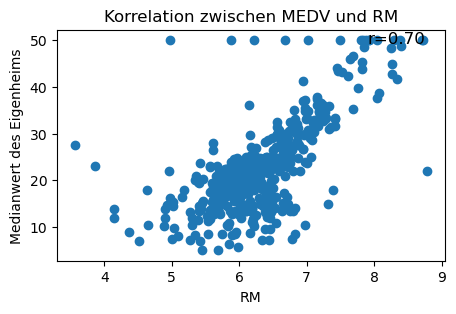

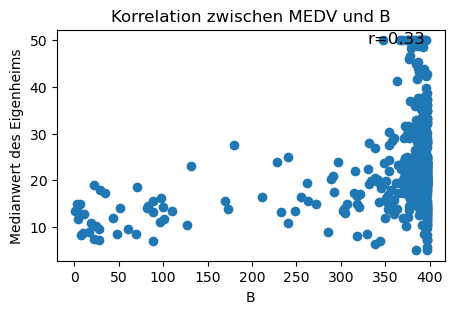

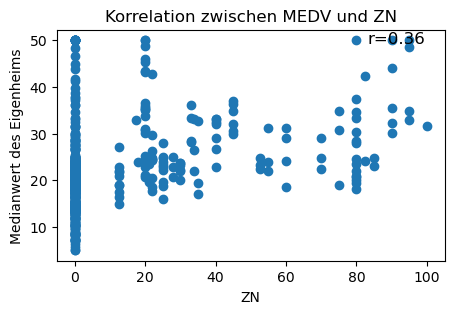

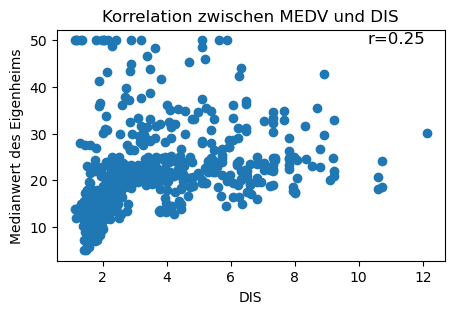

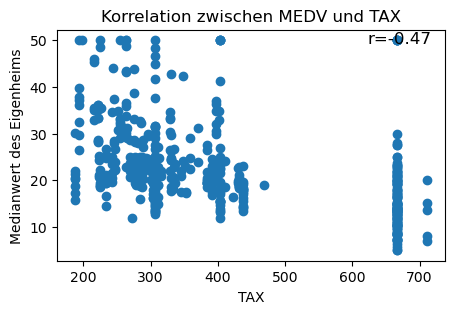

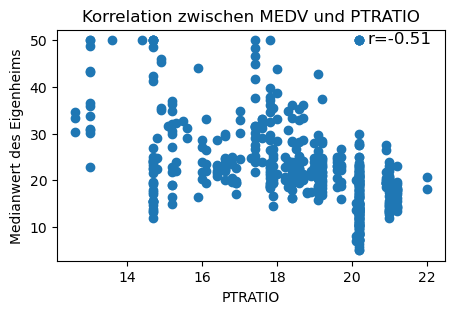

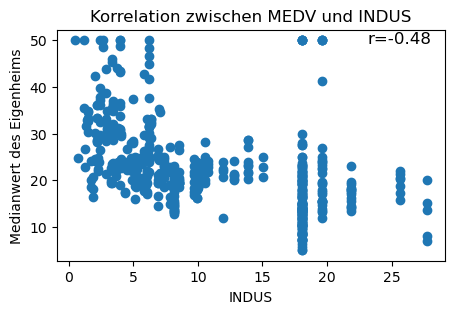

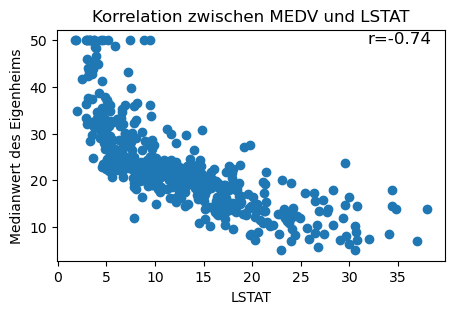

In [570]:

for feature in x:
    pt.figure(figsize=(5,3))

    # Streudiagramm erzeugen
    correlation = np.corrcoef(data["MEDV"], data[feature])[0, 1]
    pt.scatter(data[feature], data["MEDV"])

    # Titel und Achsenbeschriftungen erzeugen
    pt.title("Korrelation zwischen MEDV und {}".format(feature, correlation))
    pt.xlabel(feature)
    pt.ylabel("Medianwert des Eigenheims")
    
    # Korrelationskoeffizienten hinzufügen
    pt.annotate("r={:.2f}".format(correlation), (0.8, 0.94),
                    xycoords="axes fraction",
                    fontsize=12,
                    color="black")

    # Diagramm ausgeben
    pt.show()


Korrelationen ausgeben

In [555]:
corr_matrix = data.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


## Algorithmus trainieren

Features-Array auf die Korrelationsstärksten Features beschränken

In [556]:
x = data[['RM','B','ZN','DIS','TAX','PTRATIO','INDUS','LSTAT']]

**Trainingsdaten** und **Testdaten** splitten

In [557]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42) #splittung in training und test daten

Modell erstellen und trainieren

In [558]:
lr = LinearRegression() # lineares Regressionsmodell-Objekt erzeugen
lr.fit(x_train, y_train) # Trainieren des LinearRegression-Objekts


LinearRegression()

Algorithmus berechent Vorhersagen (`Predictions`), anhand von `x_test` und tut die ersten *n* Predictions (Vorhersagen) ausgeben

In [559]:
predictions = lr.predict(x_test) # Vorhersagen speichern
n=10
print(predictions[0:n]) # gibt die ersten n Vorhersagen aus
print(y_test[0:n]) # die ersten n tatsächlichen Werte aus


[[28.47233299]
 [32.67070537]
 [17.13047031]
 [24.39772668]
 [18.80627657]
 [22.28306451]
 [17.57652554]
 [14.56881559]
 [20.68602283]
 [21.31672588]]
     MEDV
173  23.6
274  32.4
491  13.6
72   22.8
452  16.1
76   20.0
316  17.8
140  14.0
471  19.6
500  16.8


## Evaluation

### $ R^2 $-Score
von **0 bis 1**, wobei 1 perfekt wäre <br>
$ R^2 = \frac{\sum_{i=1}^{n}(y_i-predictions_i)^2}{\sum_{i=1}^{n}(y_i-mean(y))^2} $

In [560]:
lr.score(x_test,y_test) # entspricht: r2_score(y_test, predictions)

0.6836846747872692

### Mean Squared Error
gibt durchschnittliche Quadratische Abweichung von Predictions gegenüber den tatsächlichen Werten <br>
$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - predictions_i)^2 $

In [561]:
mean_squared_error(y_test,predictions)

23.569634057157145

### Root Mean Squared Error
$ \sqrt{MSE} $

In [562]:
np.sqrt(mean_squared_error(y_test,predictions))

4.854856749396129

### Mean Absolute Error
gibt durchschnittliche Quadratische Abweichung von Predictions gegenüber den tatsächlichen Werten <br>
$ MAE = \frac{1}{n} \sum_{i=1}^{n}|y_i - predictions_i| $

In [563]:
mean_absolute_error(y_test, predictions)

3.293924779598677

### Explained Variance
gibt an, wie gut das Modell die Varianz der Zielvariable in den Testdaten erklärt. Der Wert liegt zwischen 0 und 1, wobei ein höherer Wert auf eine bessere Modellleistung hindeutet. <br>
$ EVS = 1− \frac{Var(y​−predictions)}{Var(y​)} $ <br>
$ Var(x) = \frac{1}{n}\sum_{i=1}^{n}(x_i-mean(x))^2 $
​

In [564]:
explained_variance_score(y_test, predictions)

0.6839048378811099

### Median Absolute Error
gibt den Median der Absoluten Abweichungen der Predictions gegenüber der tatsächlichen Werte <br>
$ MAE=median(∣ytest​−predictions∣) $

In [565]:
median_absolute_error(y_test, predictions)

2.2097012190479397

## Präzision der Prediction visualisieren via Streudiagramm

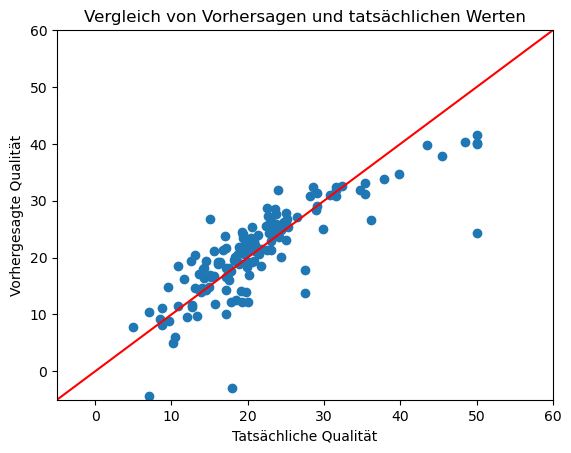

In [566]:
pt.scatter(y_test, predictions)
pt.xlim(-5, 60)
pt.ylim(-5, 60)
pt.xlabel('Tatsächliche Qualität')
pt.ylabel('Vorhergesagte Qualität')
pt.title('Vergleich von Vorhersagen und tatsächlichen Werten')
pt.plot([-5, 60], [-5, 60], 'r')
pt.show()

<hr>

### Anderen `random_state` ausprobieren
**Ziel**: Score erhöhen

Random States von 0-499 ausprobieren

In [567]:
scores = [] # Array, in das die r2-scores gespeichert werden
r_states = [] # die Random-States, die benutzt werden

for k in range(500): # 500 Random-States ausprobieren
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=k)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    predictions = lr.predict(x_test)
    score = lr.score(x_test,y_test)
    scores.append(score) # ausgerechneten Score in Array speichern
    r_states.append(k)

Ergebnisse Visualisieren

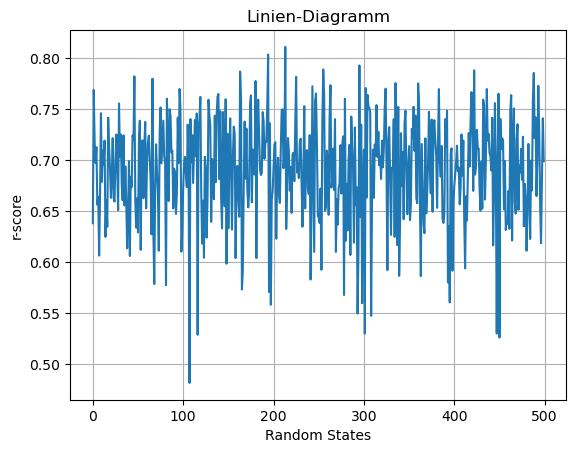

In [568]:
pt.plot(r_states, scores) # Datenpunkte

# Achsenbeschriftungen und Titel hinzufügen
pt.xlabel('Random States')
pt.ylabel('r-score')
pt.title('Linien-Diagramm')

# Gitter hinzufügen
pt.grid(True)

# Diagramm anzeigen
pt.show()

In [569]:
scores = pd.DataFrame(scores) # Array in DF umwandeln
print("Median: ", scores[0].median()) # Median ausgeben
scores.describe() # andere Statistiken ausgeben

Median:  0.6945046252579703


,0
count,500.000000
mean,0.690238
std,0.051445
min,0.481223
25%,0.659817
50%,0.694505
75%,0.725200
max,0.811152
